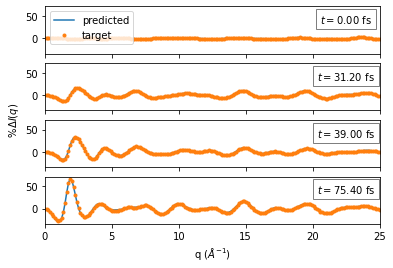

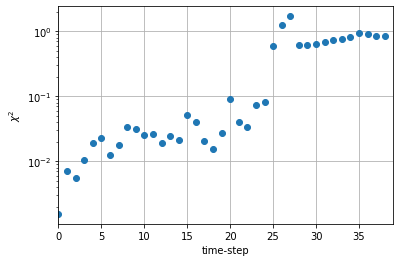

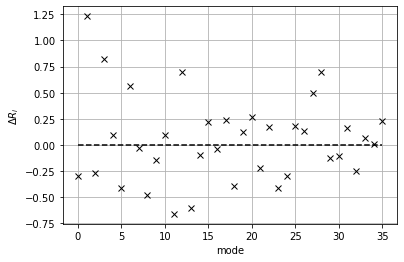

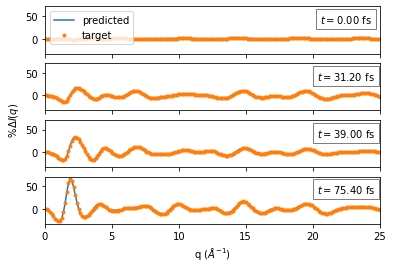

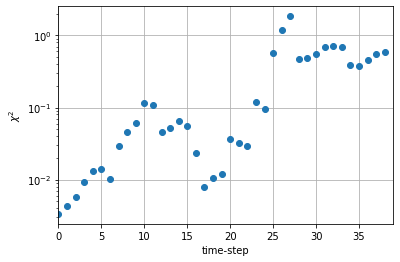

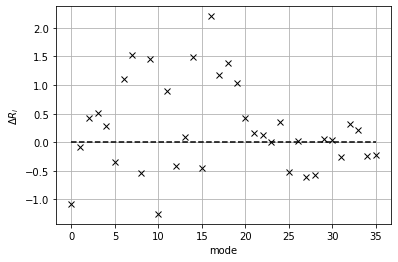

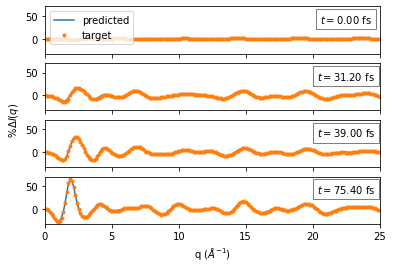

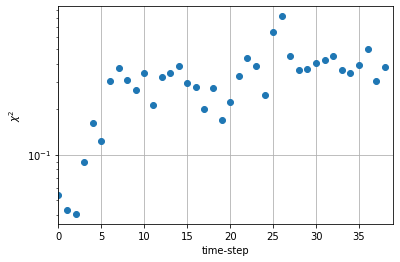

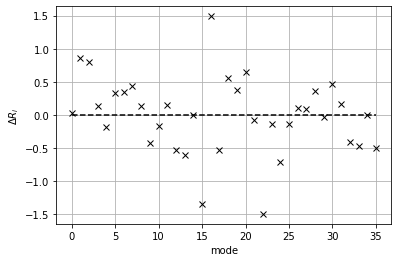

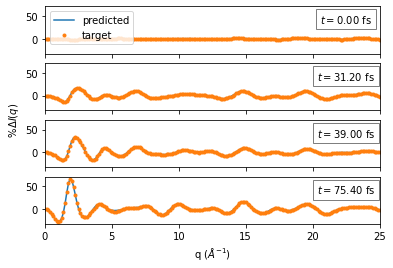

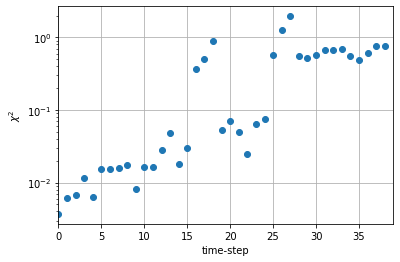

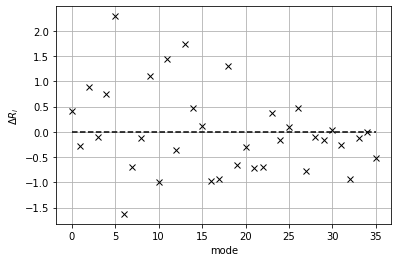

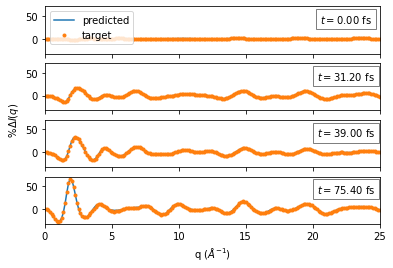

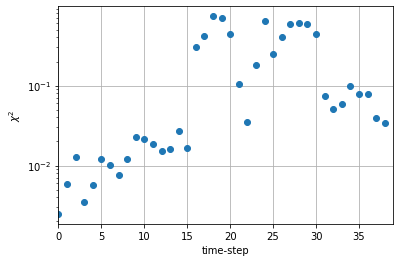

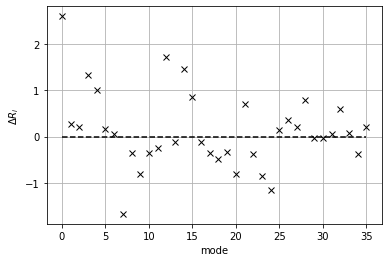

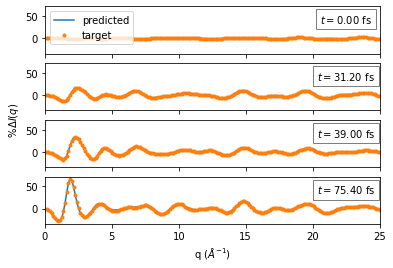

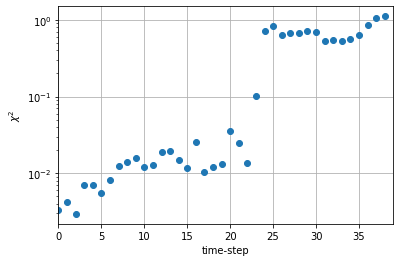

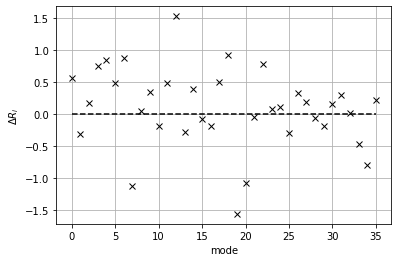

In [2]:
import numpy as np
import matplotlib.pyplot as p

title = 'chd'
plot_bool = True
png_plot = False
png_plot_rmsd = False

#stepsize_list=(0.01, 0.1, 0.2, 0.5, 1.0)
#stepsize_list=[0.05]
#qmax_list=(4.0, 6.0, 8.0)
qmax_list=[25.0]
#N = 400
Nt = 39
nsteps_list = [995, 1995, 2992, 2994, 2995, 4994]
ds = 0.2
"""
    step_size=step_size,
    nsteps=nsteps,
    qvector=qvector,
    target_pcd_array=target_pcd_array,
    final_pcd_traj=final_pcd_traj,
    final_xyz_traj=final_xyz_traj,
    final_chi2_traj=final_chi2_traj,
    factor_distribution=factor_distribution,
    chi2_path=chi2_path,
"""
#final_chd_qmax_25.0_ds_0.10_N_499_nt_1.xyz...
#final_chd_qmax_4.0_ds_0.10_N_498_nt_40.xyz
#data_chd_qmax_4.0_ds_0.10_N_990_nt_20.npz
#data_chd_qmax_25.0_ds_0.10_N_100_nt_1.npz
c = -1
for qq in qmax_list:
    for N in nsteps_list:
        c += 1
        
        data_file = ('data_%s_qmax_%2.1f_ds_%3.2f_N_%i_nt_%i.npz' 
                    % (title, qq, ds, N, Nt))
        f = np.load(data_file)
        target_pcd_array = f['target_pcd_array']
        final_pcd_array = f['final_pcd_traj']
        final_xyz_array = f['final_xyz_traj']
        final_chi2_array = f['final_chi2_traj']
        factor_distribution = f['factor_distribution']
        #chi2_path = f['chi2_path']
        step_size = f['step_size']
        qvector = f['qvector']
        qmax = qvector[-1]

        time_points = np.array([0, 12, 15, 29])
        #time_points = np.array([0])
        fs_points = time_points * 2.6
        target_pcd = target_pcd_array[:, time_points]
        final_pcd = final_pcd_array[:, time_points]
        final_chi2 = final_chi2_array[time_points]
        if plot_bool:
            p.figure(1 + 3*c)
            ax1 = p.subplot(411)
            p.plot(qvector, final_pcd[:, 0])
            p.plot(qvector, target_pcd[:, 0], '.')
            p.tick_params('x', labelbottom=False)
            p.legend(('predicted', 'target'), loc='upper left')
            ypos = 43
            xpos = 0.9*qmax
            al = 0.5
            p.text(xpos, ypos, '$t = %3.2f$ fs' % fs_points[0], 
                         horizontalalignment='center',
                         verticalalignment='center',
                         bbox=dict(facecolor='white', alpha=al))
            ax2 = p.subplot(412, sharex=ax1, sharey=ax1)
            p.plot(qvector, final_pcd[:, 1])
            p.plot(qvector, target_pcd[:, 1], '.')
            p.tick_params('x', labelbottom=False)
            p.text(xpos, ypos, '$t = %3.2f$ fs' % fs_points[1], 
                         horizontalalignment='center',
                         verticalalignment='center',
                         bbox=dict(facecolor='white', alpha=al))
            ax3 = p.subplot(413, sharex=ax1, sharey=ax1)
            p.plot(qvector, final_pcd[:, 2])
            p.plot(qvector, target_pcd[:, 2], '.')
            p.tick_params('x', labelbottom=False)
            p.ylabel('               %$\Delta I(q)$')
            p.text(xpos, ypos, '$t = %3.2f$ fs' % fs_points[2], 
                         horizontalalignment='center',
                         verticalalignment='center',
                         bbox=dict(facecolor='white', alpha=al))
            ax4 = p.subplot(414, sharex=ax1, sharey=ax1)
            p.plot(qvector, final_pcd[:, 3])
            p.plot(qvector, target_pcd[:, 3], '.')
            p.xlabel('q $(\AA^{-1})$')
            p.xlim(0, qmax)
            p.text(xpos, ypos, '$t = %3.2f$ fs' % fs_points[3], 
                         horizontalalignment='center',
                         verticalalignment='center',
                         bbox=dict(facecolor='white', alpha=al))
            #p.grid()
            p.show()       

            p.figure(2 + 3*c)
            p.semilogy(list(range(Nt)), final_chi2_array, 'o')
            p.grid()
            p.xlabel('time-step')
            p.ylabel('$\chi^2$')
            p.xlim((0, Nt))
            p.show()
            #p.legend(stepsize_list)
            if png_plot:
                fname = ('%s_chi2_vary_stepsize_qmax_%2.1f.png' % 
                      (title, qmax))
                fname = '%s_chi2_vary_qmax.png' % title
                p.savefig(fname, dpi=300, facecolor='w', 
                        edgecolor='w', orientation='portrait', 
                        format='png', transparent=False, 
                        bbox_inches='tight', pad_inches=0.1, 
                        metadata=None)

            p.figure(3 + 3*c)
            p.plot(factor_distribution, 'kx')
            p.plot(np.zeros(len(factor_distribution)), 'k--')
            p.xlabel('mode')
            p.ylabel('$\Delta R_i$')
            p.grid()

40
39.0
[  0.    2.6   5.2   7.8  10.4  13.   15.6  18.2  20.8  23.4  26.   28.6
  31.2  33.8  36.4  39.   41.6  44.2  46.8  49.4  52.   54.6  57.2  59.8
  62.4  65.   67.6  70.2  72.8  75.4  78.   80.6  83.2  85.8  88.4  91.
  93.6  96.2  98.8 101.4]


(0.0, 102.4)

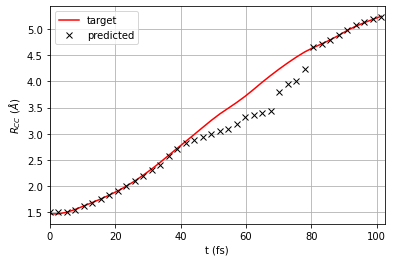

In [36]:
import numpy as np
import matplotlib.pyplot as p

rCC_target = np.loadtxt('RCC_R_traj001.dat')
rCC_predicted = np.loadtxt('RCC_chd_qmax_25.0_ds_0.20_N_1996_nt_40.dat')
print(rCC_target.shape[0])
print(rCC_target[-1, 0])
time = np.linspace(0, 2.6 * rCC_target[-1, 0], rCC_target.shape[0])
print(time)
p.plot(time, rCC_target[:, 1], 'r')
p.plot(time, rCC_predicted[:, 1], 'kx')
p.legend(('target', 'predicted'))
p.xlabel('t (fs)')
p.ylabel('$R_{CC}\ (\AA)$')
p.grid()
p.xlim((0, time[-1] + 1))

chi2_min T = 0: 0.00020
chi2_min T = 0.1: 0.00017
chi2_min T = 0.2: 0.00011
chi2_min T = 0.5: 0.00015
chi2_min T = 1.0: 0.00022
chi2_min T = 0(2000): 0.00018
chi2_min T = 0.1(2000): 0.00006
chi2_min T = 0.2(2000): 0.00004
chi2_min T = 0.5(2000): 0.00001
chi2_min T = 1.0(2000): 0.00007


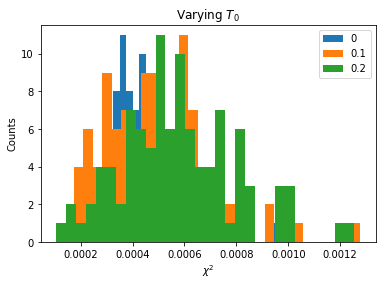

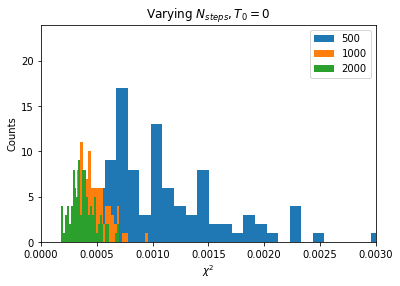

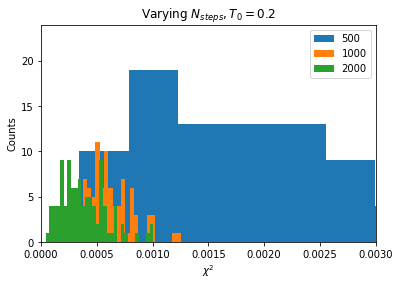

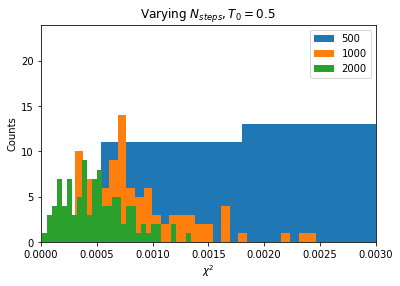

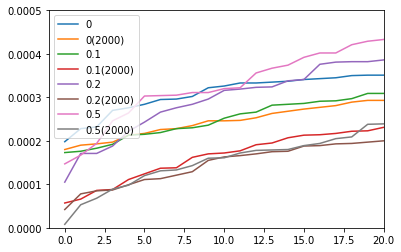

In [100]:
fpath = 'chd_data'
chi2_0p0 = np.loadtxt('%s/T0p0_ds0p1_q4_25_N1000_100runs.dat' % fpath)
chi2_0p1 = np.loadtxt('%s/T0p1_ds0p1_q4_25_N1000_100runs.dat' % fpath)
chi2_0p2 = np.loadtxt('%s/T0p2_ds0p1_q4_25_N1000_100runs.dat' % fpath)
chi2_0p5 = np.loadtxt('%s/T0p5_ds0p1_q4_25_N1000_100runs.dat' % fpath)
chi2_1p0 = np.loadtxt('%s/T1p0_ds0p1_q4_25_N1000_100runs.dat' % fpath)

chi2_0p0_500 = np.loadtxt('%s/T0p0_ds0p1_q4_25_N500_100runs.dat' % fpath)
chi2_0p1_500 = np.loadtxt('%s/T0p1_ds0p1_q4_25_N500_100runs.dat' % fpath)
chi2_0p2_500 = np.loadtxt('%s/T0p2_ds0p1_q4_25_N500_100runs.dat' % fpath)
chi2_0p5_500 = np.loadtxt('%s/T0p5_ds0p1_q4_25_N500_100runs.dat' % fpath)
chi2_1p0_500 = np.loadtxt('%s/T1p0_ds0p1_q4_25_N500_100runs.dat' % fpath)

chi2_0p0_2000 = np.loadtxt('%s/T0p0_ds0p1_q4_25_N2000_100runs.dat' % fpath)
chi2_0p1_2000 = np.loadtxt('%s/T0p1_ds0p1_q4_25_N2000_100runs.dat' % fpath)
chi2_0p2_2000 = np.loadtxt('%s/T0p2_ds0p1_q4_25_N2000_100runs.dat' % fpath)
chi2_0p5_2000 = np.loadtxt('%s/T0p5_ds0p1_q4_25_N2000_100runs.dat' % fpath)
chi2_1p0_2000 = np.loadtxt('%s/T1p0_ds0p1_q4_25_N2000_100runs.dat' % fpath)

print('chi2_min T = 0: %6.5f'   % min(chi2_0p0))
print('chi2_min T = 0.1: %6.5f' % min(chi2_0p1))
print('chi2_min T = 0.2: %6.5f' % min(chi2_0p2))
print('chi2_min T = 0.5: %6.5f' % min(chi2_0p5))
print('chi2_min T = 1.0: %6.5f' % min(chi2_1p0))
print('chi2_min T = 0(2000): %6.5f'   % min(chi2_0p0_2000))
print('chi2_min T = 0.1(2000): %6.5f' % min(chi2_0p1_2000))
print('chi2_min T = 0.2(2000): %6.5f' % min(chi2_0p2_2000))
print('chi2_min T = 0.5(2000): %6.5f' % min(chi2_0p5_2000))
print('chi2_min T = 1.0(2000): %6.5f' % min(chi2_1p0_2000))

p.figure(1)
nbins = 30
p.hist(chi2_0p0, bins=nbins)
p.hist(chi2_0p1, bins=nbins)
p.hist(chi2_0p2, bins=nbins)
p.xlabel('$\chi^2$')
p.ylabel('Counts')
p.title('Varying $T_0$')
p.legend((0, 0.1, 0.2))

p.figure(2)
p.hist(chi2_0p0_500, bins=nbins)
p.hist(chi2_0p0, bins=nbins)
p.hist(chi2_0p0_2000, bins=nbins)
p.xlabel('$\chi^2$')
p.ylabel('Counts')
p.title('Varying $N_{steps}, T_0=0$')
p.legend((500, 1000, 2000))
p.xlim((0, .003))
p.ylim((0, 24))

p.figure(3)
#p.subplot(111)
p.hist(chi2_0p2_500, bins=nbins)
p.hist(chi2_0p2, bins=nbins)
p.hist(chi2_0p2_2000, bins=nbins)
p.xlabel('$\chi^2$')
p.ylabel('Counts')
p.title('Varying $N_{steps}, T_0=0.2$')
p.legend((500, 1000, 2000))
p.xlim((0, .003))
p.ylim((0, 24))

p.figure(4)
#p.subplot(212)
p.hist(chi2_0p5_500, bins=nbins)
p.hist(chi2_0p5, bins=nbins)
p.hist(chi2_0p5_2000, bins=nbins)
p.xlabel('$\chi^2$')
p.ylabel('Counts')
p.title('Varying $N_{steps}, T_0=0.5$')
p.legend((500, 1000, 2000))
p.xlim((0, .003))
p.ylim((0, 24))

p.figure(5)
p.plot(np.sort(chi2_0p0))
p.plot(np.sort(chi2_0p0_2000))
p.plot(np.sort(chi2_0p1))
p.plot(np.sort(chi2_0p1_2000))
p.plot(np.sort(chi2_0p2))
p.plot(np.sort(chi2_0p2_2000))
p.plot(np.sort(chi2_0p5))
p.plot(np.sort(chi2_0p5_2000))
#p.plot(np.sort(chi2_1p0))
p.xlim((-1, 20))
p.ylim((0, .0005))
p.legend((0, '0(2000)', 0.1, '0.1(2000)', 0.2, '0.2(2000)', 0.5, '0.5(2000)', 1, '1(2000)'))

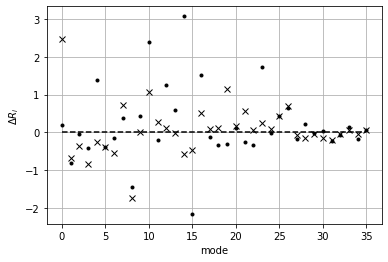

In [104]:
# factor dist
fdist1000 = np.load('data_chd_qmax_4.0_T0_0.5_ds_0.10_N_1000_Nruns_5.npz')['factor_distribution']
fdist2000 = np.load('data_chd_qmax_4.0_T0_0.5_ds_0.10_N_2000_Nruns_5.npz')['factor_distribution']
p.plot(fdist1000, 'kx')
p.plot(fdist2000, 'k.')
p.plot(np.zeros(len(fdist1000)), 'k--')
p.xlabel('mode')
p.ylabel('$\Delta R_i$')
p.grid()